<a href="https://colab.research.google.com/github/ruus77/Python/blob/main/PL_Matches_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import os
from google.colab import files
import missingno as msno


In [60]:
#files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ruus77","key":"82a7a40585acaec025d9c060bf135bd9"}'}

In [61]:
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [62]:
!kaggle datasets download -d zaeemnalla/premier-league

Dataset URL: https://www.kaggle.com/datasets/zaeemnalla/premier-league
License(s): unknown
premier-league.zip: Skipping, found more recently modified local copy (use --force to force download)


In [63]:
from zipfile import ZipFile

with ZipFile("/content/premier-league.zip", "r") as zip_ref:
    zip_ref.extractall("/content/premier-league")


In [64]:
df = pd.read_csv("/content/premier-league/results.csv")

In [65]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [66]:
df.shape

(4560, 6)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   4560 non-null   object 
 1   away_team   4560 non-null   object 
 2   home_goals  4560 non-null   float64
 3   away_goals  4560 non-null   float64
 4   result      4560 non-null   object 
 5   season      4560 non-null   object 
dtypes: float64(2), object(4)
memory usage: 213.9+ KB


In [68]:
df.dtypes

,0
home_team,object
away_team,object
home_goals,float64
away_goals,float64
result,object
season,object


In [69]:
df['season'].value_counts()

,count
season,
2006-2007,380
2007-2008,380
2008-2009,380
2009-2010,380
2010-2011,380
2011-2012,380
2012-2013,380
2013-2014,380
2014-2015,380


In [70]:
df['home_goals'].value_counts()

,count
home_goals,
1.0,1448
2.0,1125
0.0,1057
3.0,573
4.0,234
5.0,77
6.0,30
7.0,10
8.0,5


In [71]:
df['away_goals'].value_counts()

,count
away_goals,
0.0,1570
1.0,1559
2.0,870
3.0,386
4.0,129
5.0,32
6.0,13
7.0,1


<Axes: >

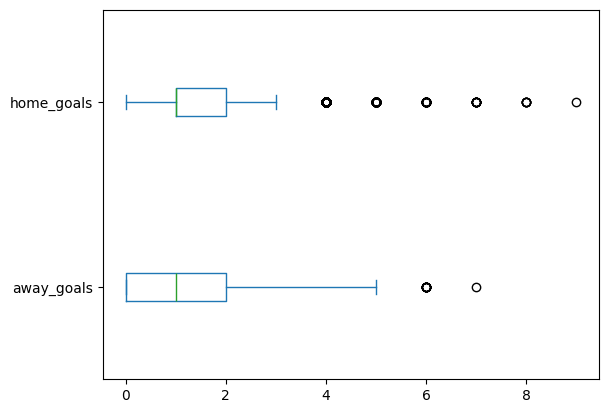

In [72]:
df[["away_goals", "home_goals"]].plot(kind="box", vert=False)

In [73]:
(df[["home_goals", "away_goals"]] < 0).sum()

,0
home_goals,0
away_goals,0


<Axes: xlabel='result'>

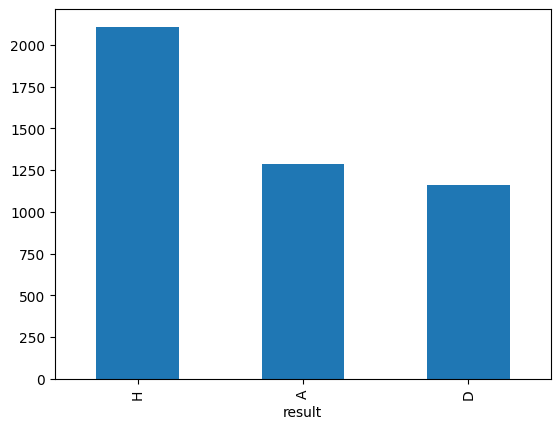

In [74]:
df["result"].value_counts().plot(kind="bar")

In [75]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [76]:
df["result"].value_counts()

,count
result,
H,2108
A,1288
D,1164


In [77]:
df.loc[df["home_goals"] > df['away_goals'], "result"] = "H"
df.loc[df["home_goals"] < df['away_goals'], "result"] = "A"
df.loc[df["home_goals"] == df['away_goals'], "result"] = "D"
df["result"].value_counts()

,count
result,
H,2108
A,1288
D,1164


In [78]:
(df["away_goals"] + df["home_goals"]).mean()

np.float64(2.6875)

In [79]:
df["total_goals"] = df["home_goals"] + df["away_goals"]

In [80]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,2.0
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,2.0
2,Everton,Watford,2.0,1.0,H,2006-2007,3.0
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,3.0
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,3.0


In [81]:
df.sort_values("season")["total_goals"].mean()

np.float64(2.6875)

In [82]:
df.groupby("season")["total_goals"].mean().sort_index(ascending=False)

,total_goals
season,
2017-2018,2.678947
2016-2017,2.800000
2015-2016,2.700000
2014-2015,2.565789
2013-2014,2.768421
2012-2013,2.797368
2011-2012,2.805263
2010-2011,2.797368
2009-2010,2.771053


In [83]:
df["goals_diff"] = abs(df['away_goals'] - df["home_goals"])
df.head()


,home_team,away_team,home_goals,away_goals,result,season,total_goals,goals_diff
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,2.0,0.0
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,2.0,0.0
2,Everton,Watford,2.0,1.0,H,2006-2007,3.0,1.0
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,3.0,1.0
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,3.0,3.0


In [91]:
df["goals_diff"].value_counts().sort_index(ascending=False)

,count
goals_diff,
8.0,4
7.0,3
6.0,24
5.0,65
4.0,185
3.0,455
2.0,962
1.0,1698
0.0,1164


In [94]:
df.loc[df["goals_diff"] == 8]

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goals_diff
1265,Tottenham Hotspur,Wigan Athletic,9.0,1.0,H,2009-2010,10.0,8.0
1514,Chelsea,Wigan Athletic,8.0,0.0,H,2009-2010,8.0,8.0
2458,Chelsea,Aston Villa,8.0,0.0,H,2012-2013,8.0,8.0
3116,Southampton,Sunderland,8.0,0.0,H,2014-2015,8.0,8.0


In [114]:
df.loc[df["result"] == "A"].groupby("away_team")["result"].size().sort_values(ascending=False)

,result
away_team,
Chelsea,123
Manchester United,119
Arsenal,103
Manchester City,100
Liverpool,98
Tottenham Hotspur,90
Everton,64
Aston Villa,51
West Ham United,43


In [118]:
df.groupby("home_team")["home_goals"].sum().sort_values(ascending=False).head()

,home_goals
home_team,
Manchester City,501.0
Manchester United,495.0
Chelsea,491.0
Arsenal,479.0
Liverpool,466.0


In [123]:
df["goals_ratio"] = df["away_goals"] / len(df["home_team"])
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goals_diff,goals_ratio
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,2.0,0.0,0.000219
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,2.0,0.0,0.000219
2,Everton,Watford,2.0,1.0,H,2006-2007,3.0,1.0,0.000219
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,3.0,1.0,0.000219
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,3.0,3.0,0.000000


In [135]:
home_games_per_team = df.groupby("home_team")[["home_team", "away_goals"]].agg({
    "home_team" : "size",
    "away_goals" : "sum"

}).rename(
    columns={
    "home_team" : "total_games",
    "away_goals" : "goals_received"
}).sort_values(by=["total_games", "goals_received"], ascending=[False, True])

In [138]:
home_games_per_team["goals_received_per_match"] = round(home_games_per_team["goals_received"] / home_games_per_team["total_games"], 2)

In [142]:
home_games_per_team.sort_values(by="goals_received_per_match", ascending=True)

,total_games,goals_received,goals_received_per_match
home_team,,,
Manchester United,228,160.0,0.70
Liverpool,228,182.0,0.80
Arsenal,228,185.0,0.81
Chelsea,228,186.0,0.82
Manchester City,228,192.0,0.84
Tottenham Hotspur,228,219.0,0.96
Birmingham City,57,58.0,1.02
Everton,228,238.0,1.04
Charlton Athletic,19,20.0,1.05


In [144]:
df.groupby("away_team")["away_goals"].sum().sort_values(ascending=False)

,away_goals
away_team,
Arsenal,382.0
Manchester United,372.0
Chelsea,368.0
Manchester City,365.0
Liverpool,351.0
Tottenham Hotspur,342.0
Everton,257.0
Aston Villa,216.0
West Ham United,212.0
